In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias.html

In [2]:
filename = 'covid19-es-and.csv'
fecha = '14/04/2020'
url = 'https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias/detalle/234496.html'

In [3]:
# Load
tables = pd.read_html(url, header=0, thousands='.')
assert len(tables) > 0
dfL = tables[0]
dfL.set_index(['Provincia'], inplace=True)
dfL

,Positivo,Casos que han precisado hospitalización,Casos que han precisado ingreso UCI,Fallecimientos,Curados
Provincia,,,,,
Almería,414,176,34,38,96
Cádiz,1001,452,70,60,203
Córdoba,1190,462,57,58,197
Granada,1864,973,110,180,375
Huelva,337,177,27,27,61
Jaén,1177,590,59,111,209
Málaga,2240,1253,145,184,597
Sevilla,2083,971,129,178,294
Total,10306,5054,631,836,2032


In [4]:
# Prepare
provincias = ['Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla', 'Total']
dfP = pd.DataFrame(0, index=provincias, columns=['Ingresados','Altas', 'Bajas'])

dfP['Ingresados'] = dfL['Casos que han precisado hospitalización']
dfP['Altas'] = dfL['Curados']
dfP['Bajas'] = dfL['Fallecimientos']
dfP['Fecha'] = fecha

dfP

,Ingresados,Altas,Bajas,Fecha
Almería,176,96,38,14/04/2020
Cádiz,452,203,60,14/04/2020
Córdoba,462,197,58,14/04/2020
Granada,973,375,180,14/04/2020
Huelva,177,61,27,14/04/2020
Jaén,590,209,111,14/04/2020
Málaga,1253,597,184,14/04/2020
Sevilla,971,294,178,14/04/2020
Total,5054,2032,836,14/04/2020


In [5]:
# Save to csv
dfP.to_csv(filename, encoding='utf-8', header=False, mode='+a', index_label='Provincia')

In [6]:
# Load full csv
dfCSV = pd.read_csv(filename, index_col='Provincia', thousands='.')

In [7]:
# Select & calc
title = 'COVID19 Andalucía'
total = dfCSV.loc['Total']['Ingresados'].pct_change() * 100
huelva = dfCSV.loc['Huelva']['Ingresados'].pct_change() * 100
malaga  = dfCSV.loc['Málaga']['Ingresados'].pct_change() * 100
# x Axis
xA = dfCSV.loc['Total']['Fecha']

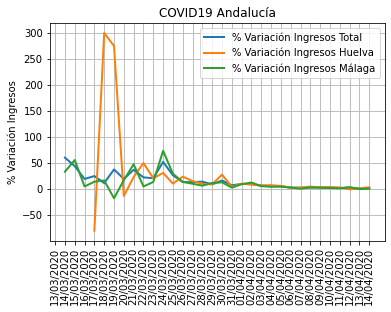

In [8]:
# Draw 
plt.plot(xA, total, label='% Variación Ingresos Total', linewidth=2)
plt.plot(xA, huelva, label='% Variación Ingresos Huelva', linewidth=2)
plt.plot(xA, malaga, label='% Variación Ingresos Málaga', linewidth=2)
plt.title(title)
plt.ylabel('% Variación Ingresos')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

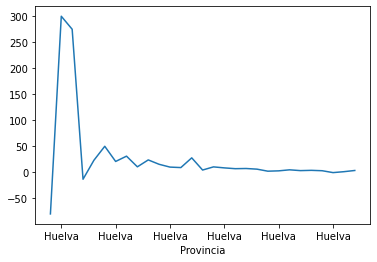

In [9]:
huelva.plot()

In [10]:
huelva.tail()

Provincia
Huelva    3.773585
Huelva    3.030303
Huelva   -0.588235
Huelva    1.183432
Huelva    3.508772
Name: Ingresados, dtype: float64